# Imports

In [1]:
from ericpackage.data_cleaning import *
from ericpackage.feature_engineering import *
from ericpackage.feature_selection import *
from ericpackage.modeling import *
from ericpackage.error_analysis import *
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

# Leitura de dados

In [2]:
caminho = 'C://Users//mxcy//Documents//'
dados = pd.read_csv(caminho + 'houseprice.csv', encoding='utf8')

# Sanity Check

In [3]:
#profile = ProfileReport(dados, title='Pandas Profiling Report', explorative=True)

In [4]:
#profile.to_file("your_report.html")

In [5]:
dados.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
tabela, lista_cat, lista_num = dc_features_tipos(dados)

In [7]:
lista_num

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [8]:
lista_cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [9]:
tabela, lista_cat_nulos, lista_num_nulos = dc_nulos(dados)

In [10]:
tabela.head()

,coluna,dtype,nulos,percent_nulos
0,Id,int64,0,0.000000
1,MSSubClass,int64,0,0.000000
2,MSZoning,object,0,0.000000
3,LotFrontage,float64,259,0.177397
4,LotArea,int64,0,0.000000


In [11]:
lista_num_nulos

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

# Separação de conjunto de dados

In [12]:
target= 'SalePrice'
X = dados.iloc[:, dados.columns != target]
y = dados.loc[:, target]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

# Limpeza de dados

###### Drop colunas:

In [13]:
lista_colunas_retirar = ['Id','PoolQC', 'SalePrice']

In [14]:
def retira_colunas(dataset,lista_colunas_retirar):
    print('qtd colunas antes: '+str(dataset.shape[1]))
    dataset.drop(columns = lista_colunas_retirar, inplace=True, errors = 'ignore')
    print('qtd colunas depois: '+str(dataset.shape[1]))
    return dataset

dados = retira_colunas(X_train,lista_colunas_retirar)

qtd colunas antes: 80
qtd colunas depois: 78


C:\Users\mxcy\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


###### Atualização das listas:

In [15]:
lista_num_nulos =[i for i in lista_num_nulos if i not in lista_colunas_retirar] 
lista_cat_nulos = [i for i in lista_cat_nulos if i not in lista_colunas_retirar]
lista_num = [i for i in lista_num if i not in lista_colunas_retirar]
lista_cat = [i for i in lista_cat if i not in lista_colunas_retirar]

##### Drop de registros (duplicatas e outliers):

In [16]:
X_train, y_train = dc_duplicatas(X_train, y_train)

Número de registros antes da filtragem:1022
Número de registros depois da filtragem:1022


C:\Users\mxcy\Anaconda3\lib\site-packages\ericpackage\data_cleaning.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep='first', inplace=True)


##### Impute para missing data:

In [17]:
lista_variaveis = lista_num_nulos 
forma = 'mean'

In [18]:
X_train, imputer1 = dc_fillna_custom(X_train, lista_variaveis, forma)
#X_val = imputer1.transform(X_val)

Método aplicado:
mean
Imputação nas variáveis:
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [19]:
lista_variaveis = lista_cat_nulos 
forma = 'categorical'
X_train, imputer2 = dc_fillna_custom(X_train, lista_variaveis, forma)
#X_val = imputer1.transform(X_val)

Método aplicado:
categorical
Imputação nas variáveis:
['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Fence', 'MiscFeature']


# Feature Engineering

##### Transformações Numéricas

In [20]:
lista_num = lista_num

In [21]:
print(lista_variaveis)

['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Fence', 'MiscFeature']


In [22]:
lista_variaveis = lista_num
forma = 'Log' 
X_train2, tf1, lista_variaveis_trans1 = fe_numerical_transform(X_train, lista_variaveis, forma, valor=None)
print(len(X_train2.columns))
X_train = original_e_transformada(X_train,X_train2, lista_variaveis_trans1, sufixo = forma)
X_train.head(1)

78


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MSSubClass_Log,LotFrontage_Log,LotArea_Log,OverallQual_Log,OverallCond_Log,YearBuilt_Log,YearRemodAdd_Log,1stFlrSF_Log,GrLivArea_Log,TotRmsAbvGrd_Log,GarageYrBlt_Log,MoSold_Log,YrSold_Log
64,60,RL,69.668667,9375,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,573.0,TA,TA,PConc,Gd,TA,No,GLQ,739,Unf,0,318,1057,GasA,Ex,Y,SBrkr,1057,977,0,2034,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,1998.0,RFn,2,645,TA,TA,Y,576,36,0,0,0,0,GdPrv,Missing,0,2,2009,WD,Normal,4.094345,4.243751,9.145802,1.94591,1.609438,7.599401,7.599902,6.96319,7.61776,2.079442,7.599902,0.693147,7.605392


In [23]:
forma='Reciprocal'
X_train2, tf2, lista_variaveis_trans2 = fe_numerical_transform(X_train, lista_variaveis, forma, valor=None)
print(len(X_train2.columns))
X_train = original_e_transformada(X_train,X_train2, lista_variaveis_trans2, sufixo = forma)
X_train.head(1)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt', 'MoSold', 'YrSold']
91


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MSSubClass_Log,LotFrontage_Log,LotArea_Log,OverallQual_Log,OverallCond_Log,YearBuilt_Log,YearRemodAdd_Log,1stFlrSF_Log,GrLivArea_Log,TotRmsAbvGrd_Log,GarageYrBlt_Log,MoSold_Log,YrSold_Log,MSSubClass_Reciprocal,LotFrontage_Reciprocal,LotArea_Reciprocal,OverallQual_Reciprocal,OverallCond_Reciprocal,YearBuilt_Reciprocal,YearRemodAdd_Reciprocal,1stFlrSF_Reciprocal,GrLivArea_Reciprocal,TotRmsAbvGrd_Reciprocal,GarageYrBlt_Reciprocal,MoSold_Reciprocal,YrSold_Reciprocal
64,60,RL,69.668667,9375,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,573.0,TA,TA,PConc,Gd,TA,No,GLQ,739,Unf,0,318,1057,GasA,Ex,Y,SBrkr,1057,977,0,2034,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,1998.0,RFn,2,645,TA,TA,Y,576,36,0,0,0,0,GdPrv,Missing,0,2,2009,WD,Normal,4.094345,4.243751,9.145802,1.94591,1.609438,7.599401,7.599902,6.96319,7.61776,2.079442,7.599902,0.693147,7.605392,0.016667,0.014354,0.000107,0.142857,0.2,0.000501,0.000501,0.000946,0.000492,0.125,0.000501,0.5,0.000498


In [24]:
forma='Power'
X_train2, tf3, lista_variaveis_trans3 = fe_numerical_transform(X_train, lista_variaveis, forma, valor=1.5)
print(len(X_train2.columns))
X_train = original_e_transformada(X_train,X_train2, lista_variaveis_trans3, sufixo = forma)
X_train.head(1)

104


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MSSubClass_Log,LotFrontage_Log,LotArea_Log,OverallQual_Log,OverallCond_Log,YearBuilt_Log,YearRemodAdd_Log,1stFlrSF_Log,GrLivArea_Log,TotRmsAbvGrd_Log,GarageYrBlt_Log,MoSold_Log,YrSold_Log,MSSubClass_Reciprocal,LotFrontage_Reciprocal,LotArea_Reciprocal,OverallQual_Reciprocal,OverallCond_Reciprocal,YearBuilt_Reciprocal,YearRemodAdd_Reciprocal,1stFlrSF_Reciprocal,GrLivArea_Reciprocal,TotRmsAbvGrd_Reciprocal,GarageYrBlt_Reciprocal,MoSold_Reciprocal,YrSold_Reciprocal,MSSubClass_Power,LotFrontage_Power,LotArea_Power,OverallQual_Power,OverallCond_Power,YearBuilt_Power,YearRemodAdd_Power,MasVnrArea_Power,BsmtFinSF1_Power,BsmtFinSF2_Power,BsmtUnfSF_Power,TotalBsmtSF_Power,1stFlrSF_Power,2ndFlrSF_Power,LowQualFinSF_Power,GrLivArea_Power,BsmtFullBath_Power,BsmtHalfBath_Power,FullBath_Power,HalfBath_Power,BedroomAbvGr_Power,KitchenAbvGr_Power,TotRmsAbvGrd_Power,Fireplaces_Power,GarageYrBlt_Power,GarageCars_Power,GarageArea_Power,WoodDeckSF_Power,OpenPorchSF_Power,EnclosedPorch_Power,3SsnPorch_Power,ScreenPorch_Power,PoolArea_Power,MiscVal_Power,MoSold_Power,YrSold_Power
64,60,RL,69.668667,9375,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,573.0,TA,TA,PConc,Gd,TA,No,GLQ,739,Unf,0,318,1057,GasA,Ex,Y,SBrkr,1057,977,0,2034,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,1998.0,RFn,2,645,TA,TA,Y,576,36,0,0,0,0,GdPrv,Missing,0,2,2009,WD,Normal,4.094345,4.243751,9.145802,1.94591,1.609438,7.599401,7.599902,6.96319,7.61776,2.079442,7.599902,0.693147,7.605392,0.016667,0.014354,0.000107,0.142857,0.2,0.000501,0.000501,0.000946,0.000492,0.125,0.000501,0.5,0.000498,464.758002,581.508753,907730.471767,18.520259,11.18034,89241.548468,89308.588568,13716.140747,20089.38573,0.0,5670.752331,34364.69399,34364.69399,30538.088234,0.0,91733.174501,1.0,0.0,2.828427,1.0,5.196152,1.0,22.627417,0.0,89308.588568,2.828427,16380.968378,13824.0,216.0,0.0,0.0,0.0,0.0,0.0,2.828427,90047.136151


forma='BoxCox'
X_train2, tf4, lista_variaveis_trans4 = fe_numerical_transform(X_train, lista_variaveis, forma, valor=None)
print(len(X_train2.columns))
X_train = original_e_transformada(X_train,X_train2, lista_variaveis_trans4, sufixo = forma)
X_train.head(1)

forma='YeoJohnson'
X_train2, tf5, lista_variaveis_trans5 = fe_numerical_transform(X_train, lista_variaveis, forma, valor=None)
print(len(X_train2.columns))
X_train = original_e_transformada(X_train,X_train2, lista_variaveis_trans5, sufixo = forma)
X_train.head(1)

##### Transformações categóricas

In [25]:
lista_variaveis = lista_cat
forma = 'ohe'

X_train, encoder1 = fe_categorical_transform(X_train, y_train, lista_variaveis, forma , valor=None)

In [26]:
forma = 'RareLabel'

In [27]:
X_train, encoder1 = fe_categorical_transform(X_train, y_train, lista_variaveis, forma , valor=None)

C:\Users\mxcy\Anaconda3\lib\site-packages\feature_engine\encoding\rare_label.py:157: UserWarning: The number of unique categories for variable Street is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
C:\Users\mxcy\Anaconda3\lib\site-packages\feature_engine\encoding\rare_label.py:157: UserWarning: The number of unique categories for variable Alley is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
C:\Users\mxcy\Anaconda3\lib\site-packages\feature_engine\encoding\rare_label.py:157: UserWarning: The number of unique categories for variable Utilities is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
C:\Users\mxcy\Anaconda3\lib\site-packages\feature_engine\encoding\rare_label.py:157: UserWarning: The number of unique categories for variable LandSlope is less than that indicated in n_categories. Thus, all categor

In [28]:
forma = 'CountFrequency'

In [29]:
X_train, encoder2 = fe_categorical_transform(X_train, y_train, lista_variaveis, forma , valor=None)

In [30]:
X_train.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MSSubClass_Log,LotFrontage_Log,LotArea_Log,OverallQual_Log,OverallCond_Log,YearBuilt_Log,YearRemodAdd_Log,1stFlrSF_Log,GrLivArea_Log,TotRmsAbvGrd_Log,GarageYrBlt_Log,MoSold_Log,YrSold_Log,MSSubClass_Reciprocal,LotFrontage_Reciprocal,LotArea_Reciprocal,OverallQual_Reciprocal,OverallCond_Reciprocal,YearBuilt_Reciprocal,YearRemodAdd_Reciprocal,1stFlrSF_Reciprocal,GrLivArea_Reciprocal,TotRmsAbvGrd_Reciprocal,GarageYrBlt_Reciprocal,MoSold_Reciprocal,YrSold_Reciprocal,MSSubClass_Power,LotFrontage_Power,LotArea_Power,OverallQual_Power,OverallCond_Power,YearBuilt_Power,YearRemodAdd_Power,MasVnrArea_Power,BsmtFinSF1_Power,BsmtFinSF2_Power,BsmtUnfSF_Power,TotalBsmtSF_Power,1stFlrSF_Power,2ndFlrSF_Power,LowQualFinSF_Power,GrLivArea_Power,BsmtFullBath_Power,BsmtHalfBath_Power,FullBath_Power,HalfBath_Power,BedroomAbvGr_Power,KitchenAbvGr_Power,TotRmsAbvGrd_Power,Fireplaces_Power,GarageYrBlt_Power,GarageCars_Power,GarageArea_Power,WoodDeckSF_Power,OpenPorchSF_Power,EnclosedPorch_Power,3SsnPorch_Power,ScreenPorch_Power,PoolArea_Power,MiscVal_Power,MoSold_Power,YrSold_Power
64,60,819,69.668667,9375,1017,960,642,923,1021,741,962,105,894,1015,858,322,7,5,1997,1998,797,1001,364,353,301,573.0,640,891,452,430,917,674,290,739,873,0,318,1057,1000,504,952,929,1057,977,0,2034,1,0,2,1,3,1,401,8,950,0,478,610,1998.0,304,2,645,919,927,933,576,36,0,0,0,0,90,978,0,2,2009,897,847,4.094345,4.243751,9.145802,1.945910,1.609438,7.599401,7.599902,6.963190,7.617760,2.079442,7.599902,0.693147,7.605392,0.016667,0.014354,0.000107,0.142857,0.2,0.000501,0.000501,0.000946,0.000492,0.125000,0.000501,0.500000,0.000498,464.758002,581.508753,907730.471767,18.520259,11.18034,89241.548468,89308.588568,13716.140747,20089.38573,0.0,5670.752331,34364.693990,34364.693990,30538.088234,0.0,91733.174501,1.0,0.0,2.828427,1.0,5.196152,1.0,22.627417,0.0,89308.588568,2.828427,16380.968378,13824.000000,216.0,0.0,0.0,0.0,0.0,0.0,2.828427,90047.136151
682,120,819,69.668667,2887,1017,960,642,99,1021,741,962,450,894,1015,858,508,6,5,1996,1997,797,1001,148,142,609,0.0,640,891,452,430,917,85,290,1003,873,0,288,1291,1000,504,952,929,1291,0,0,1291,1,0,1,0,2,1,401,6,950,1,255,610,1996.0,417,2,431,919,927,933,307,0,0,0,0,0,831,978,0,11,2008,897,847,4.787492,4.243751,7.967973,1.791759,1.609438,7.598900,7.599401,7.163172,7.163172,1.791759,7.598900,2.397895,7.604894,0.008333,0.014354,0.000346,0.166667,0.2,0.000501,0.000501,0.000775,0.000775,0.166667,0.000501,0.090909,0.000498,1314.534138,581.508753,155120.849994,14.696938,11.18034,89174.525152,89241.548468,0.000000,31765.18577,0.0,4887.522072,46386.260584,46386.260584,0.000000,0.0,46386.260584,1.0,0.0,1.000000,0.0,2.828427,1.0,14.696938,1.0,89174.525152,2.828427,8947.792521,5379.074549,0.0,0.0,0.0,0.0,0.0,0.0,36.482873,89979.911714


In [31]:
len(X_train.columns)

140

# Feature Selection

In [32]:
X_train, lista_colunas_selecionadas = fs_variancia(X_train,  0.01, ver_features_selecionadas=True)

Número de colunas antes do filtro: 140
Ths. recebido:0.01
Features selecionadas:
Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       ...
       'GarageArea_Power', 'WoodDeckSF_Power', 'OpenPorchSF_Power',
       'EnclosedPorch_Power', '3SsnPorch_Power', 'ScreenPorch_Power',
       'PoolArea_Power', 'MiscVal_Power', 'MoSold_Power', 'YrSold_Power'],
      dtype='object', length=124)
Número de colunas depois do filtro: 124


In [33]:
set(lista_colunas_selecionadas)

{'1stFlrSF',
 '1stFlrSF_Log',
 '1stFlrSF_Power',
 '2ndFlrSF',
 '2ndFlrSF_Power',
 '3SsnPorch',
 '3SsnPorch_Power',
 'Alley',
 'BedroomAbvGr',
 'BedroomAbvGr_Power',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF1_Power',
 'BsmtFinSF2',
 'BsmtFinSF2_Power',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtFullBath_Power',
 'BsmtHalfBath',
 'BsmtHalfBath_Power',
 'BsmtQual',
 'BsmtUnfSF',
 'BsmtUnfSF_Power',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'EnclosedPorch_Power',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Fireplaces',
 'Fireplaces_Power',
 'Foundation',
 'FullBath',
 'FullBath_Power',
 'Functional',
 'GarageArea',
 'GarageArea_Power',
 'GarageCars',
 'GarageCars_Power',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GarageYrBlt_Power',
 'GrLivArea',
 'GrLivArea_Log',
 'GrLivArea_Power',
 'HalfBath',
 'HalfBath_Power',
 'Heating',
 'Hea

# Modeling

##### Preparação do conjunto de Validação

In [34]:
X_val = retira_colunas(X_val, lista_colunas_retirar)

qtd colunas antes: 80
qtd colunas depois: 78


C:\Users\mxcy\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [35]:
X_val = imputer1.transform(X_val)
X_val = imputer2.transform(X_val)

In [36]:
X_val2 = tf1.transform(X_val) 
X_val = original_e_transformada(X_val,X_val2, lista_variaveis_trans1, sufixo = 'Log')
X_val2 = tf2.transform(X_val) 
X_val = original_e_transformada(X_val,X_val2, lista_variaveis_trans2, sufixo = 'Reciprocal')
X_val2 = tf3.transform(X_val) 
X_val = original_e_transformada(X_val,X_val2, lista_variaveis_trans3, sufixo = 'Power')
#X_val2 = tf4.transform(X_val) 
#X_val = original_e_transformada(X_val,X_val2, lista_variaveis_trans4, sufixo = 'BoxCox')
#X_val2 = tf5.transform(X_val) 
#X_val = original_e_transformada(X_val,X_val2, lista_variaveis_trans5, sufixo = 'YeoJohnson')

In [37]:
X_val = encoder1.transform(X_val)
X_val = encoder2.transform(X_val)


In [38]:
encoder1.encoder_dict_

{'MSZoning': Index(['RL', 'RM'], dtype='object'),
 'Street': array(['Pave', 'Grvl'], dtype=object),
 'Alley': array(['Missing', 'Pave', 'Grvl'], dtype=object),
 'LotShape': Index(['Reg', 'IR1'], dtype='object'),
 'LandContour': Index(['Lvl'], dtype='object'),
 'Utilities': array(['AllPub', 'NoSeWa'], dtype=object),
 'LotConfig': Index(['Inside', 'Corner', 'CulDSac'], dtype='object'),
 'LandSlope': array(['Gtl', 'Mod', 'Sev'], dtype=object),
 'Neighborhood': Index(['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Sawyer', 'Somerst',
        'Gilbert'],
       dtype='object'),
 'Condition1': Index(['Norm'], dtype='object'),
 'Condition2': Index(['Norm'], dtype='object'),
 'BldgType': Index(['1Fam', 'TwnhsE'], dtype='object'),
 'HouseStyle': Index(['1Story', '2Story', '1.5Fin'], dtype='object'),
 'RoofStyle': Index(['Gable', 'Hip'], dtype='object'),
 'RoofMatl': Index(['CompShg'], dtype='object'),
 'Exterior1st': Index(['VinylSd', 'HdBoard', 'Wd Sdng', 'MetalSd', 'Plywood'], dtype='object'),
 '

In [39]:
X_val = X_val[lista_colunas_selecionadas]

In [40]:
tabela, lista_cat_nulos, lista_num_nulos = dc_nulos(X_val)
lista_num_nulos

[]

randomforest
124
extratree
124
adaboost
124
gbm
124
xgboost
124
Tempo de execução (minutos):
0.2225693980852763


,tipo,modelo,erro_mse,erro_mae,r2,r2adj,top_features
3,gbm,([DecisionTreeRegressor(criterion='friedman_ms...,29441.27,16864.29,0.872324,0.821744,"[OverallQual_Power, OverallQual_Log, OverallQu..."
1,extratree,"(ExtraTreeRegressor(random_state=209652396), E...",30138.78,17833.00,0.866203,0.813197,"[OverallQual, OverallQual_Power, OverallQual_L..."
0,randomforest,"(DecisionTreeRegressor(max_features='auto', ra...",31416.25,17572.93,0.854620,0.797026,"[OverallQual_Power, OverallQual, OverallQual_L..."
4,xgboost,"XGBRegressor(base_score=0.5, booster='gbtree',...",31885.38,17507.30,0.850246,0.790919,"[OverallQual, GarageCars, KitchenAbvGr, GrLivA..."
2,adaboost,"(DecisionTreeRegressor(max_depth=3, random_sta...",35682.69,23618.51,0.812453,0.738153,"[OverallQual, OverallQual_Log, OverallQual_Pow..."


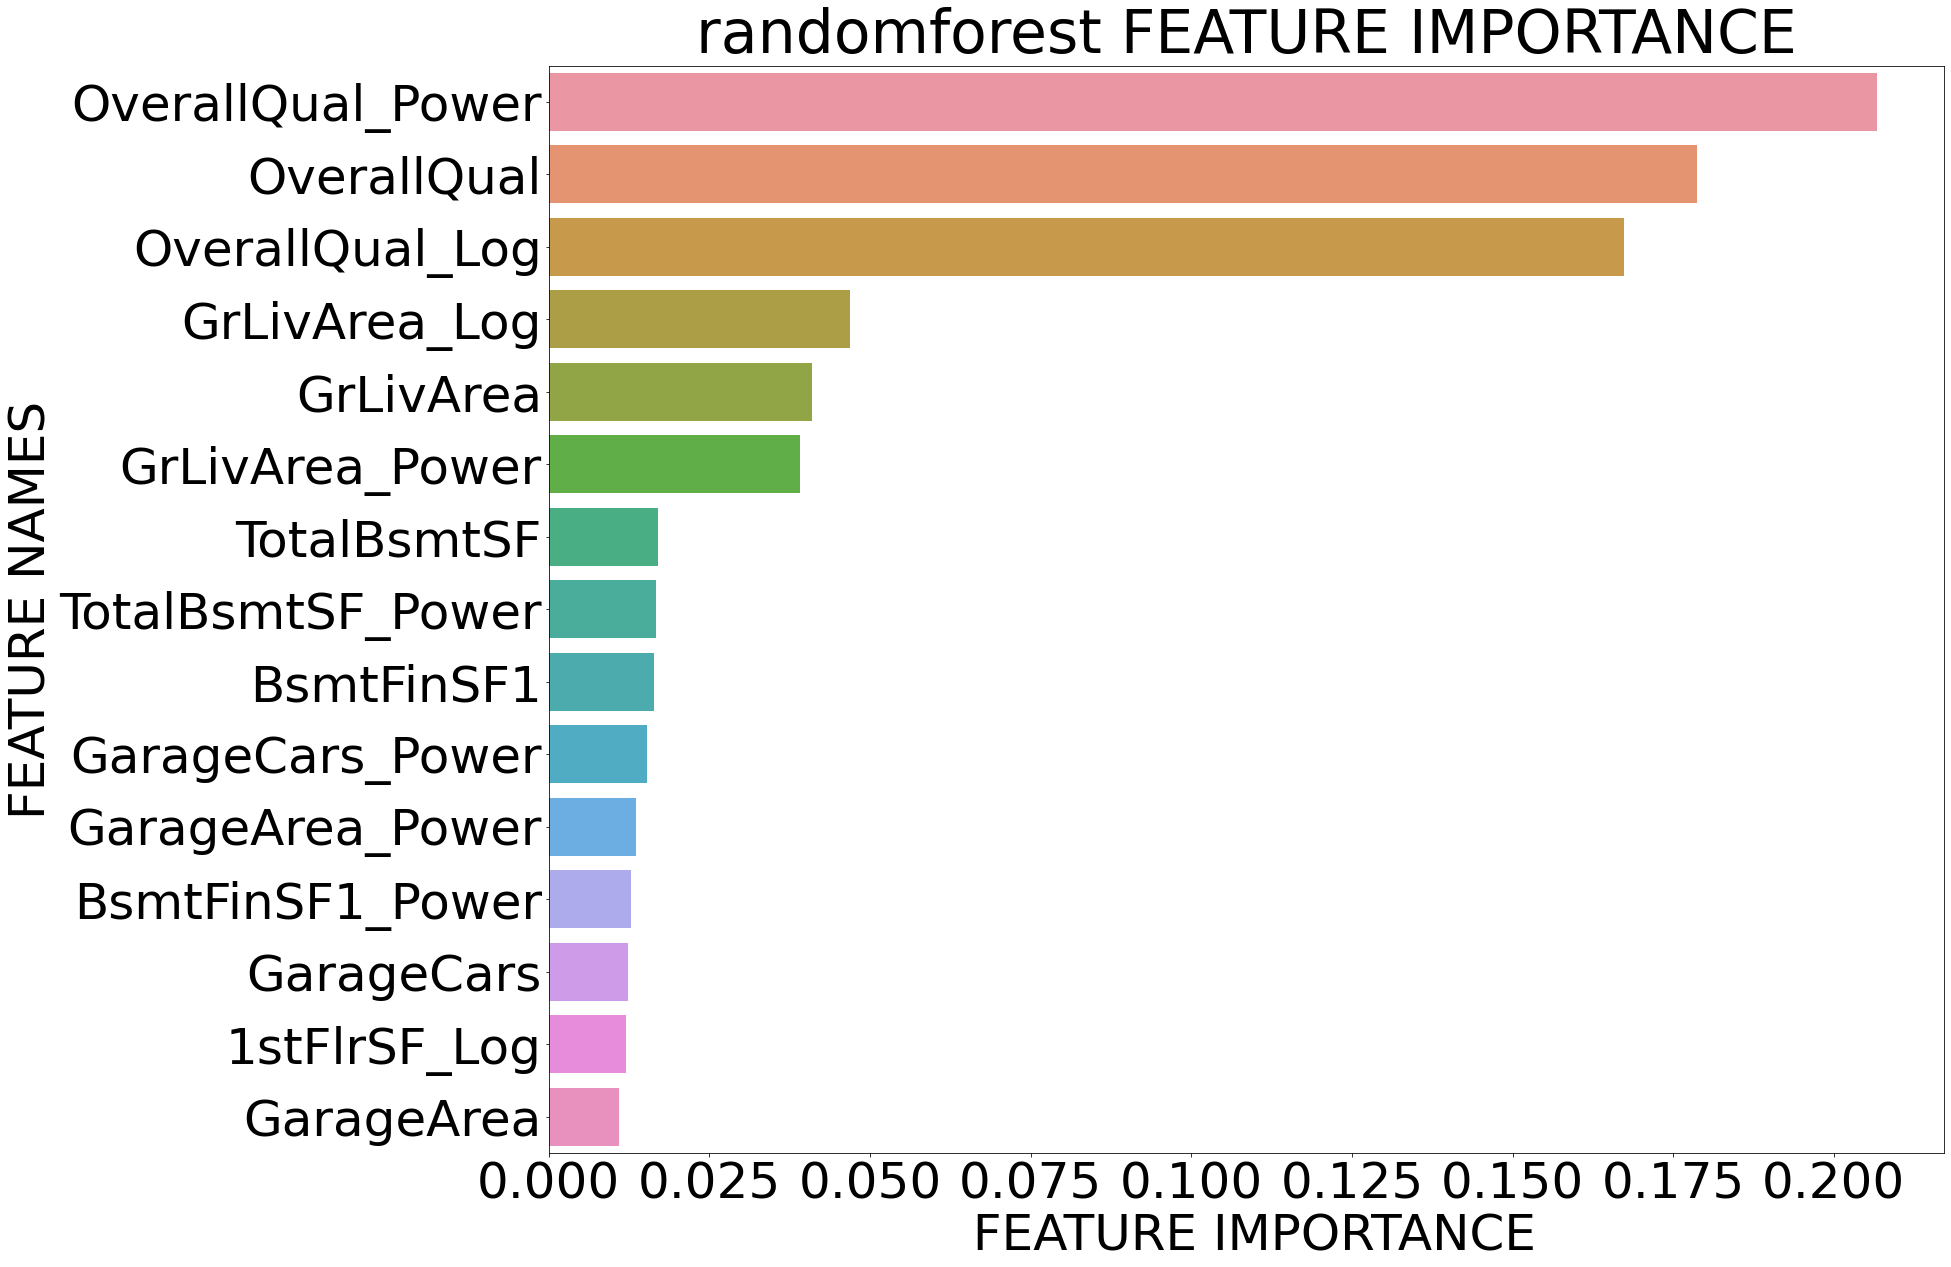

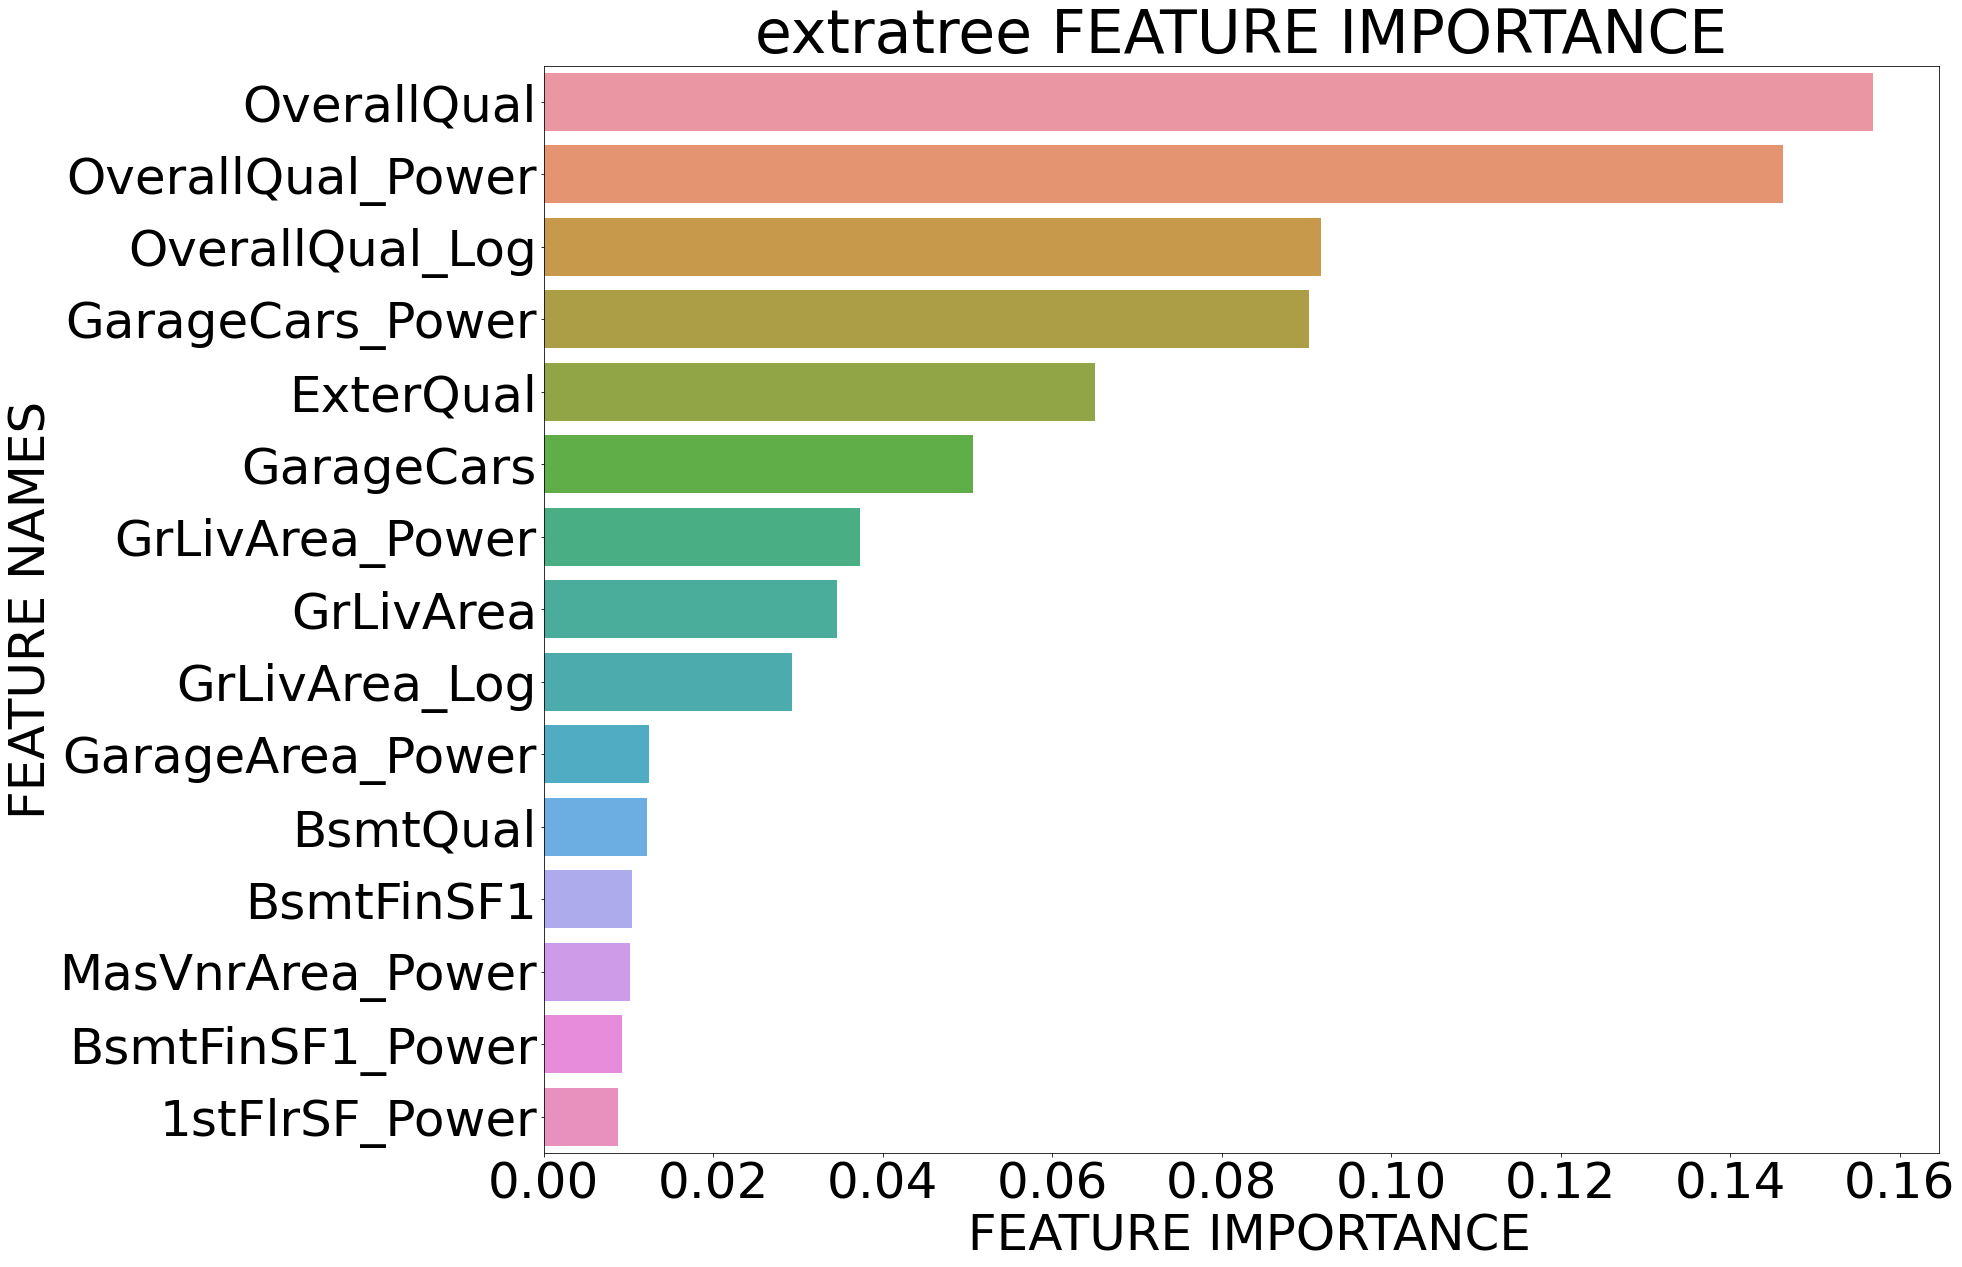

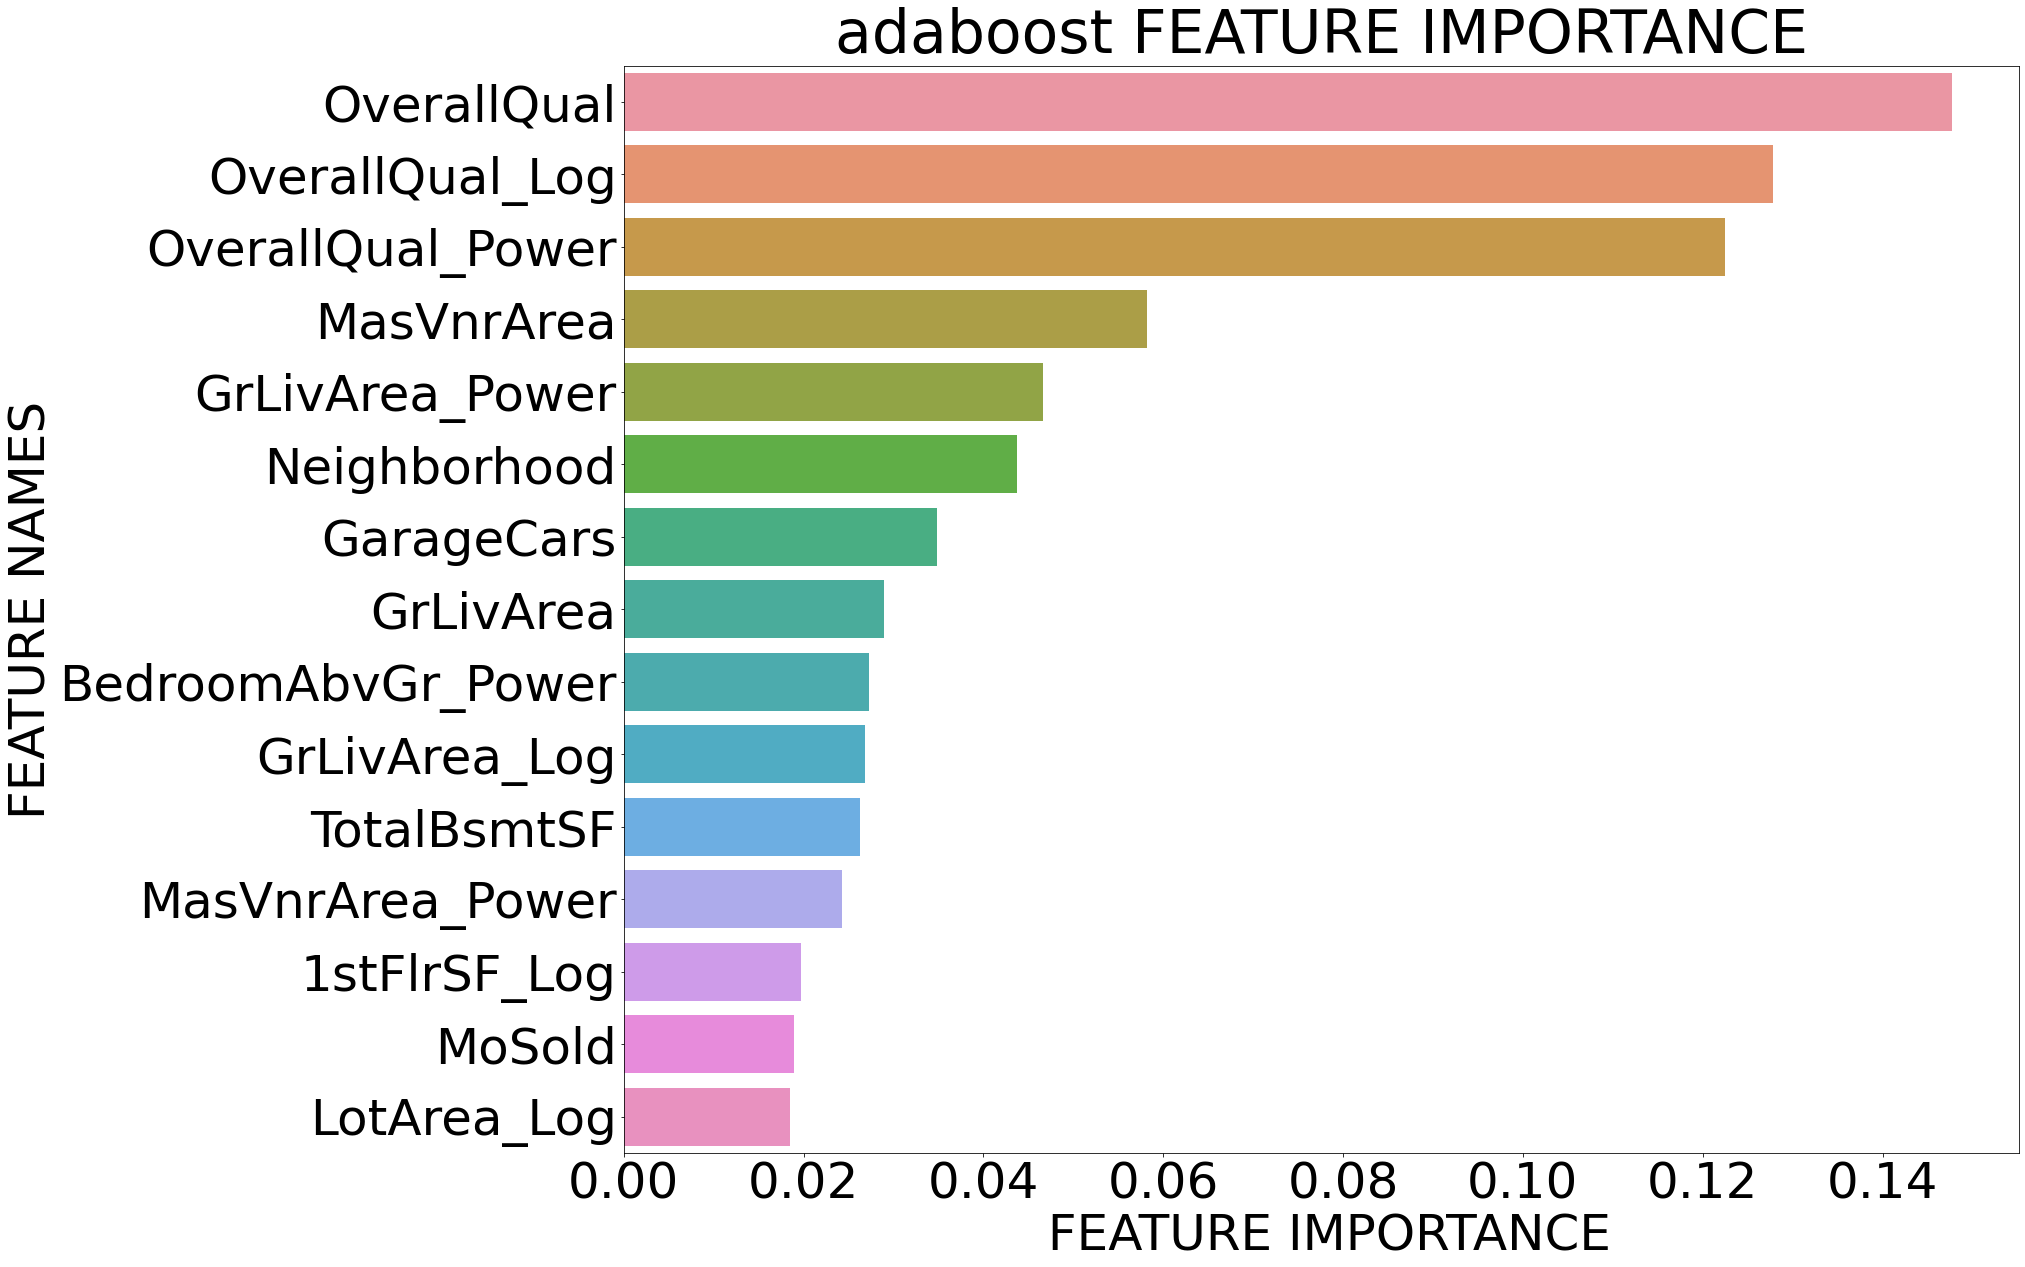

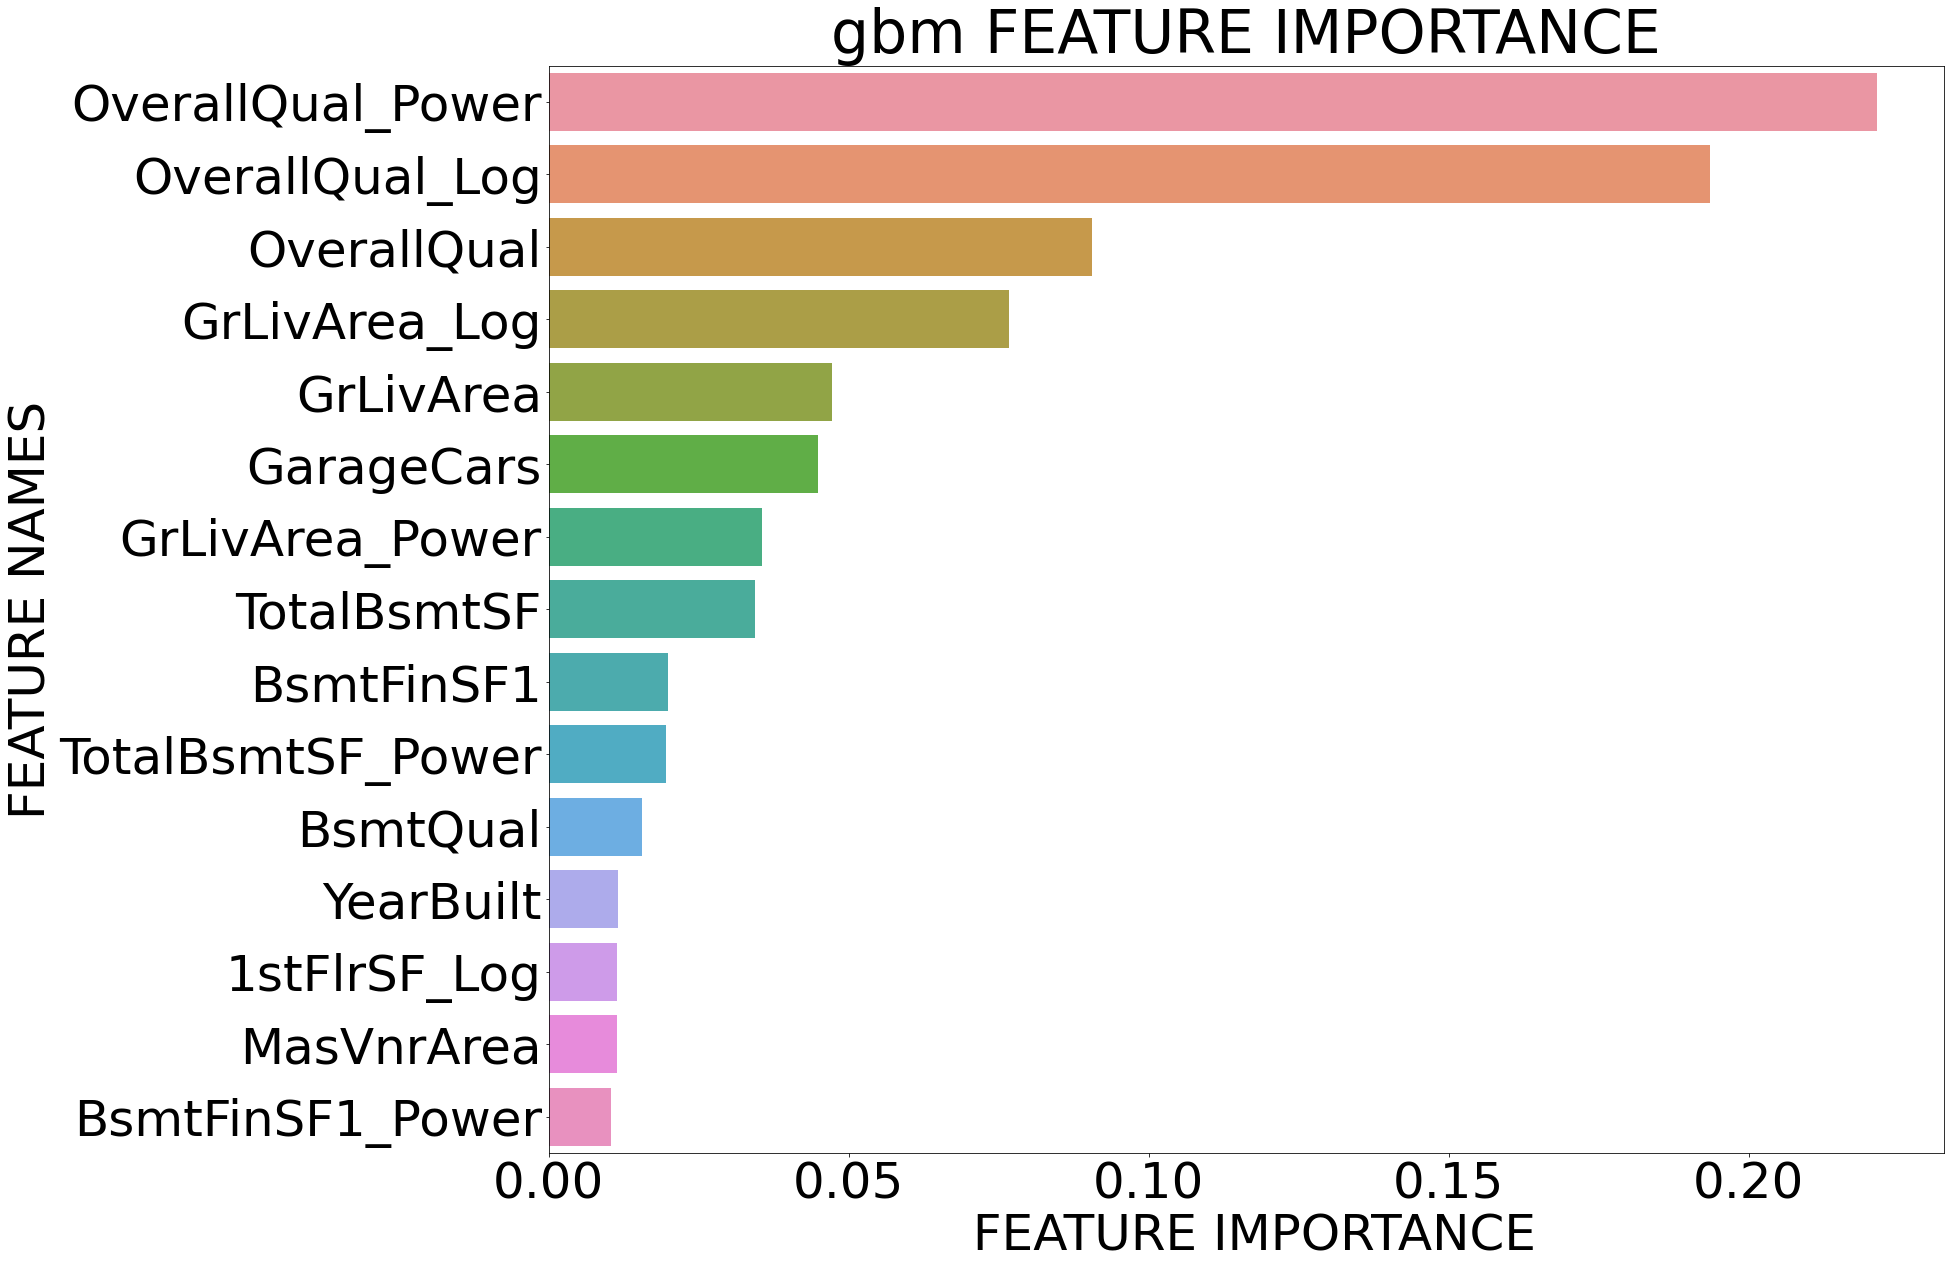

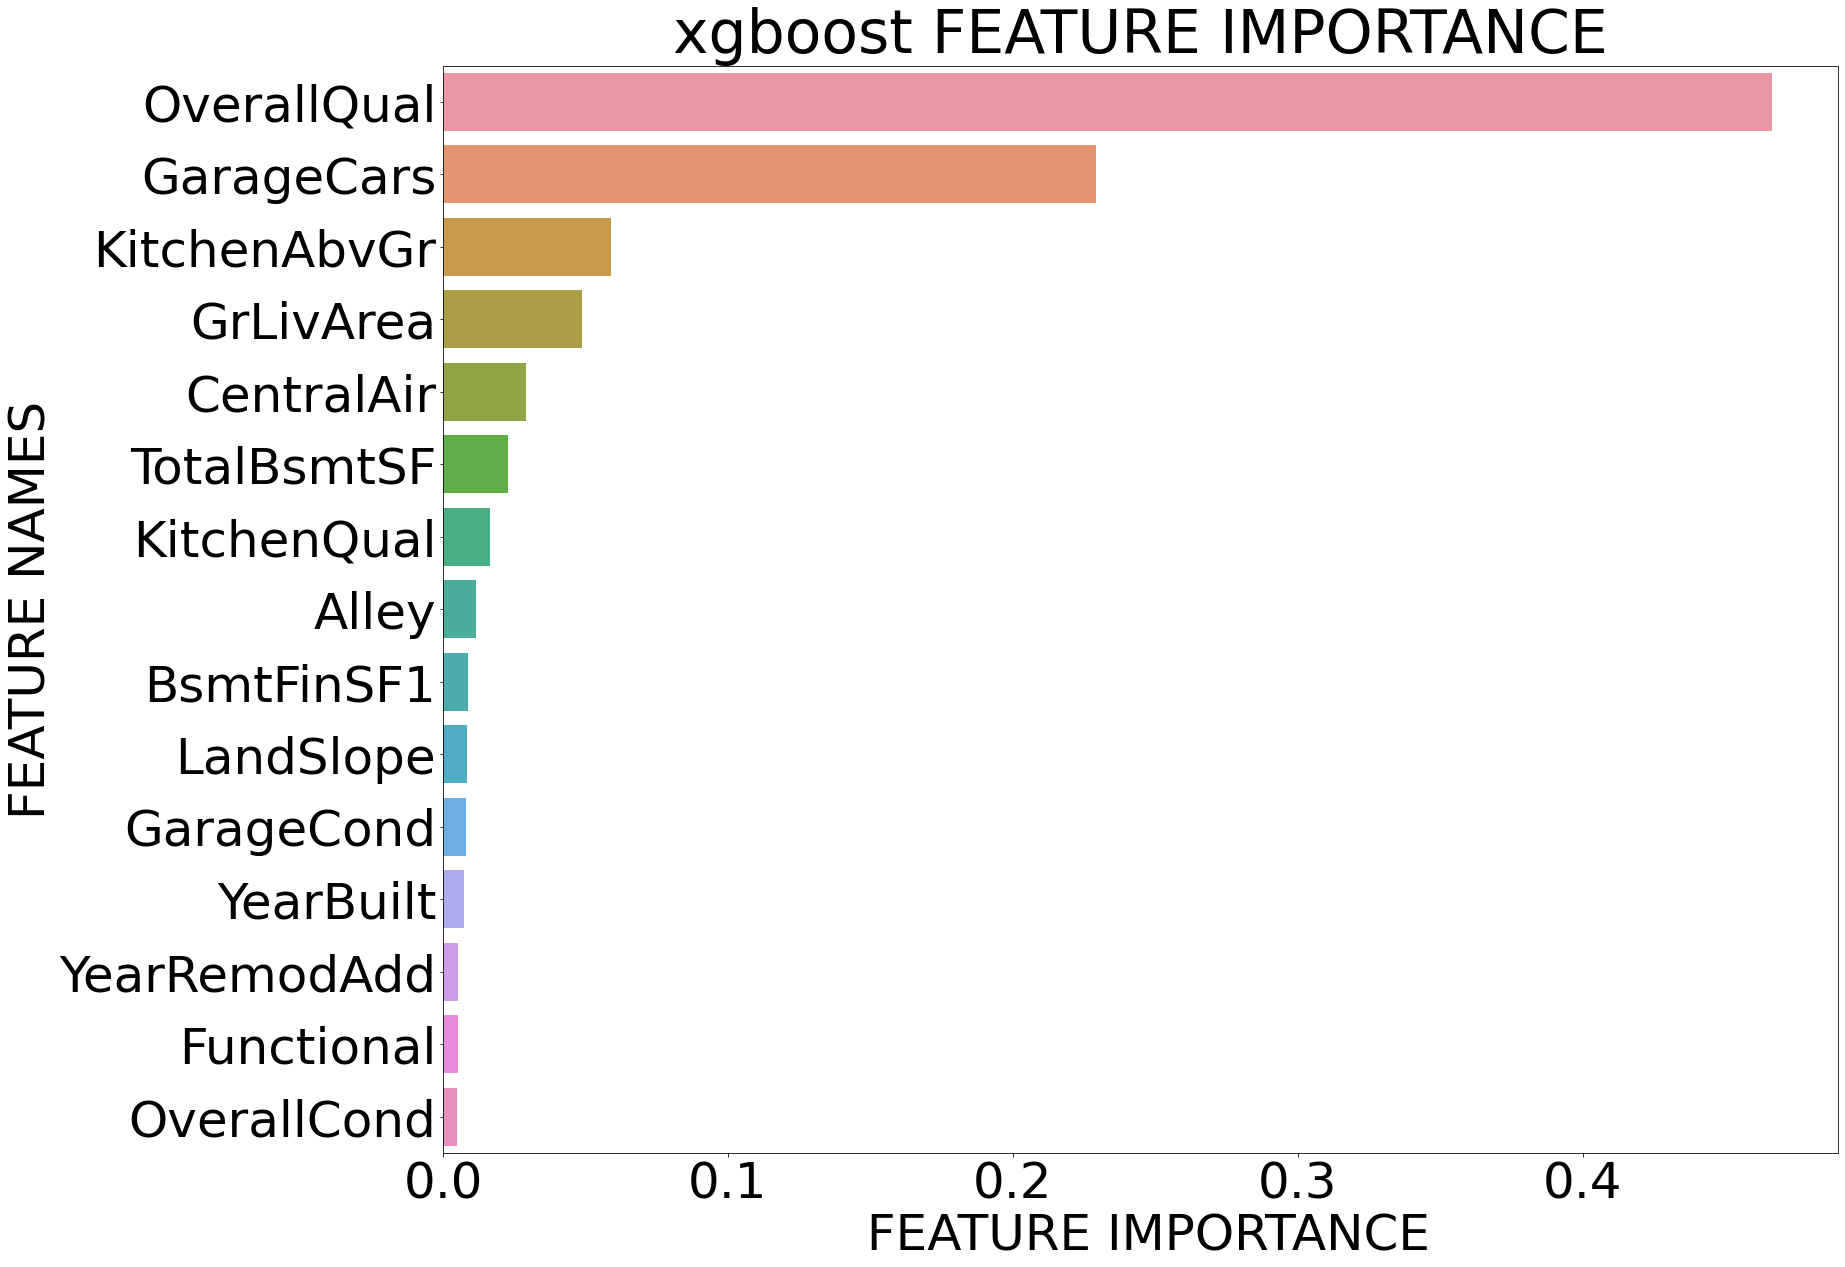

In [41]:
modelos, lista_predicoes = auto_ml_regressor(
    X_train,
    X_val,
    y_train,
    y_val,
    algoritmos=['randomforest', 'extratree', 'gbm', 'adaboost', 'xgboost'],
    search=True,
    type_search='randomsearch',
    target_transform=None)
modelos

# Avaliação de resultados

In [42]:
modelos.iloc[0,1]

GradientBoostingRegressor()

In [43]:
decomposicao_bias_variancia(modelos.iloc[0,1], X_train, y_train, X_val, y_val)

MSE: 1043876044.405
Bias: 899898196.054
Variance: 143977848.351


745000


,OverallQual_Power,OverallQual_Log,OverallQual,GrLivArea_Log,GrLivArea,GarageCars,GrLivArea_Power,TotalBsmtSF,BsmtFinSF1,TotalBsmtSF_Power,BsmtQual,YearBuilt,1stFlrSF_Log,MasVnrArea,BsmtFinSF1_Power,randomforest,extratree,adaboost,gbm,xgboost,SalePrice,gbm_real_dif,extratree_real_dif,randomforest_real_dif,xgboost_real_dif,adaboost_real_dif
259,31.622777,2.302585,10,8.637994,5642,2,423788.944273,6110,5644,477597.247689,82,2008,8.453614,796.0,424014.303985,432471.93,334799.94,335558.151463,407479.458861,246520.734375,160000,247479.458861,174799.94,272471.93,86520.734375,175558.151463
8,31.622777,2.302585,10,8.406485,4476,3,299457.446353,2396,2096,117281.691393,82,1996,7.787797,0.0,95959.266025,491914.69,524571.69,514295.288770,543502.036479,355510.750000,745000,201497.963521,220428.31,253085.31,389489.250000,230704.711230
437,27.000000,2.197225,9,7.768110,2364,3,114940.004106,2330,2188,112469.271359,82,2009,7.768110,760.0,102346.024212,434399.85,432460.07,399140.735294,453088.117915,474764.718750,611657,158568.882085,179196.93,177257.15,136892.281250,212516.264706
73,22.627417,2.079442,8,7.257708,1419,2,53453.185677,1419,945,53453.185677,430,2007,7.257708,0.0,29050.105421,224124.43,227755.71,253705.480663,241040.555297,230839.625000,392000,150959.444703,164244.29,167875.57,161160.375000,138294.519337
389,22.627417,2.079442,8,7.621685,2042,3,92274.904974,2042,0,92274.904974,82,2008,7.621685,306.0,0.000000,384768.62,347150.02,355746.534091,397547.234310,328108.250000,253293,144254.234310,93857.02,131475.62,74815.250000,102453.534091
258,22.627417,2.079442,8,8.095294,3279,3,187763.911972,1650,1416,67023.316838,430,2003,7.432484,603.0,53283.762029,407662.66,406258.42,366676.750000,400063.603587,370763.562500,538000,137936.396413,131741.58,130337.34,167236.437500,171323.250000
288,31.622777,2.302585,10,7.784057,2402,3,117722.507653,3094,1767,172099.839001,82,2008,7.784057,200.0,74277.080334,442729.50,409258.78,399140.735294,444356.169396,477635.156250,555000,110643.830604,145741.22,112270.50,77364.843750,155859.264706
216,18.520259,1.945910,7,7.252054,1411,2,53001.787998,1386,822,51599.423020,463,1977,7.252054,209.0,23567.185831,194777.44,182743.80,221230.587678,184219.808775,188238.750000,82500,101719.808775,100243.80,112277.44,105738.750000,138730.587678
281,27.000000,2.197225,9,7.590852,1980,3,88104.438027,1980,1447,88104.438027,82,2004,7.590852,66.0,55043.088785,384541.16,357950.97,387326.970588,393876.880802,306183.218750,315000,78876.880802,42950.97,69541.16,8816.781250,72326.970588
276,22.627417,2.079442,8,7.468513,1752,2,73333.287176,559,427,13216.538087,430,1988,6.984716,0.0,8823.518743,223833.28,233185.95,230831.186667,236519.175505,245379.734375,164000,72519.175505,69185.95,59833.28,81379.734375,66831.186667


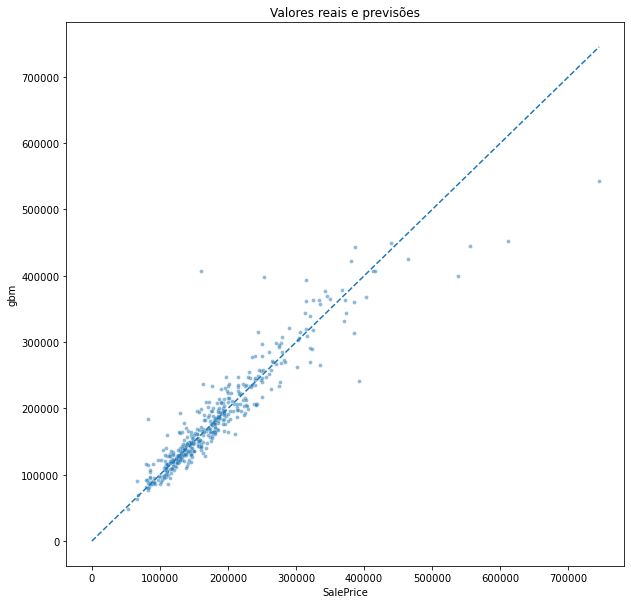

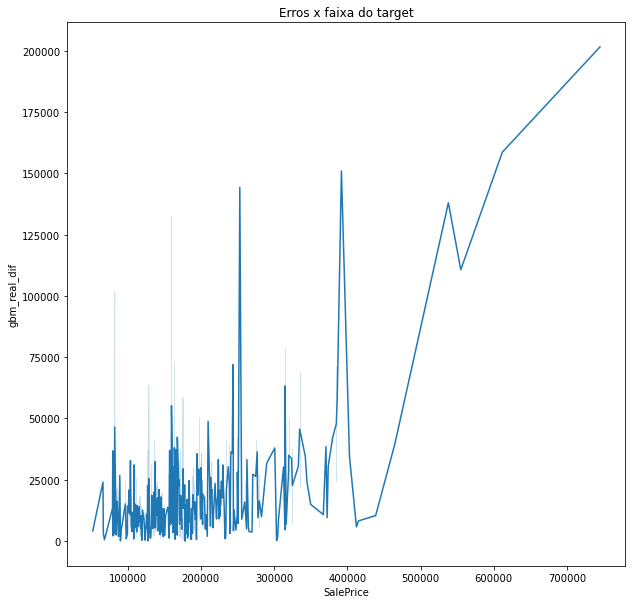

In [44]:
report_features_erros_modelos(modelos, X_val, y_val, lista_predicoes, target)

# Predição e interpretação